# Курсова робота (програмна частина)
## з дисципліни "Комп'ютерна математика ч3"
#### студента групи КН-223с 
#### виконав
#### Жорник Данило


### Визначення варіанту
#### Перша літера прізвища - Ж - 9 літера
#### Перша літера імені - Д - 6 літера
#### Сума - 15 - найбільший дільник - 5 
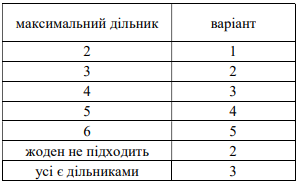
# Варіант №4

# Завдання №1

In [14]:
import numpy as np

# Вхідні параметри
N = 3               # кількість етапів
Dn = 3              # попит на продукцію щомісяця
Xmax = 4            # максимальний об'єм випуску за місяць
Imax = 4            # максимальний рівень запасів на складі
h = 2               # вартість зберігання одиниці продукції за місяць

# Функція витрат на виробництво Wn(Xn) = 6 + 5 * Xn
def production_cost(Xn):
    return 6 + 5 * Xn

# Функція для планування від кінцевого стану
def plan_from_end(target_inventory):
    min_cost = np.full((N + 1, Imax + 1), float('inf'))
    min_cost[N][target_inventory] = 0
    production_plan = np.zeros((N + 1, Imax + 1), dtype=int)
    
    # Рухаємося від кінця до початку
    for n in range(N-1, -1, -1):
        for curr_inv in range(Imax + 1):
            # Для кожного можливого рівня виробництва
            for Xn in range(Xmax + 1):
                # Попередній рівень запасів = поточні запаси + попит - виробництво
                prev_inv = curr_inv + Dn - Xn
                
                if 0 <= prev_inv <= Imax:
                    # Вартість = виробництво + зберігання
                    cost = production_cost(Xn) + h * curr_inv
                    total_cost = cost + min_cost[n+1][curr_inv]
                    
                    if total_cost < min_cost[n][prev_inv]:
                        min_cost[n][prev_inv] = total_cost
                        production_plan[n][prev_inv] = Xn
    
    # Відновлюємо оптимальний план
    optimal_plans = {}
    for I1 in range(Imax + 1):
        if min_cost[0][I1] < float('inf'):
            plan = []
            inv = I1
            for n in range(N):
                Xn = production_plan[n][inv]
                plan.append(Xn)
                inv = inv - Dn + Xn
            optimal_plans[I1] = (min_cost[0][I1], plan)
    
    return optimal_plans

# Функція для планування від початкового стану
def plan_from_start(initial_inventory):
    min_cost = np.full((N + 1, Imax + 1), float('inf'))
    min_cost[0][initial_inventory] = 0
    production_plan = np.zeros((N + 1, Imax + 1), dtype=int)
    
    # Рухаємося від початку до кінця
    for n in range(N):
        for curr_inv in range(Imax + 1):
            # Для кожного можливого рівня виробництва
            for Xn in range(Xmax + 1):
                # Наступний рівень запасів = поточні запаси + виробництво - попит
                next_inv = curr_inv + Xn - Dn
                
                if 0 <= next_inv <= Imax:
                    # Вартість = виробництво + зберігання поточного періоду
                    cost = production_cost(Xn) + h * curr_inv
                    total_cost = min_cost[n][curr_inv] + cost
                    
                    if total_cost < min_cost[n+1][next_inv]:
                        min_cost[n+1][next_inv] = total_cost
                        production_plan[n][curr_inv] = Xn
    
    # Відновлюємо оптимальний план
    optimal_plans = {}
    for I2 in range(Imax + 1):  # This should include I2 = 4 as well
        if min_cost[N][I2] < float('inf'):
            plan = []
            inv = initial_inventory
            for n in range(N):
                Xn = production_plan[n][inv]
                plan.append(Xn)
                inv = inv + Xn - Dn
            optimal_plans[I2] = (min_cost[N][I2], plan)
    
    return optimal_plans

# Отримуємо результати для обох варіантів планування
end_plans = plan_from_end(0)
start_plans = plan_from_start(0)

# Форматований вивід результатів
print("Оптимальні плани виробництва для рівня запасів на кінець планового періоду (I1 = 0):")
for I1, (cost, plan) in end_plans.items():
    plan_with_labels = [f"X{n+1} = {value}" for n, value in enumerate(plan)]
    print(f"I1 (початкові запаси) = {I1}: Мінімальні витрати = {cost:.1f}, План виробництва = [{', '.join(plan_with_labels)}]")


print("\nОптимальні плани виробництва для рівня запасів на початок планового періоду (I2 = 0):")
for I2, (cost, plan) in start_plans.items():
    plan_with_labels = [f"X{n+1} = {value}" for n, value in enumerate(plan)]
    print(f"I2 (кінцеві запаси) = {I2}: Мінімальні витрати = {cost:.1f}, План виробництва = [{', '.join(plan_with_labels)}]")


Оптимальні плани виробництва для рівня запасів на кінець планового періоду (I1 = 0):
I1 (початкові запаси) = 0: Мінімальні витрати = 63.0, План виробництва = [X1 = 3, X2 = 3, X3 = 3]
I1 (початкові запаси) = 1: Мінімальні витрати = 58.0, План виробництва = [X1 = 2, X2 = 3, X3 = 3]
I1 (початкові запаси) = 2: Мінімальні витрати = 53.0, План виробництва = [X1 = 1, X2 = 3, X3 = 3]
I1 (початкові запаси) = 3: Мінімальні витрати = 48.0, План виробництва = [X1 = 0, X2 = 3, X3 = 3]
I1 (початкові запаси) = 4: Мінімальні витрати = 45.0, План виробництва = [X1 = 0, X2 = 2, X3 = 3]

Оптимальні плани виробництва для рівня запасів на початок планового періоду (I2 = 0):
I2 (кінцеві запаси) = 0: Мінімальні витрати = 63.0, План виробництва = [X1 = 4, X2 = 4, X3 = 4]
I2 (кінцеві запаси) = 1: Мінімальні витрати = 68.0, План виробництва = [X1 = 4, X2 = 4, X3 = 4]
I2 (кінцеві запаси) = 2: Мінімальні витрати = 75.0, План виробництва = [X1 = 4, X2 = 4, X3 = 4]
I2 (кінцеві запаси) = 3: Мінімальні витрати = 84.0

# Завдання № 2

In [9]:
import numpy as np

# Матриця перехідних ймовірностей
P = np.array([[0.5, 0.2, 0.3],
              [0.1, 0.8, 0.1],
              [0.2, 0.7, 0.1]])

# Початковий вектор ймовірностей
pi_0 = np.array([1, 0, 0])

# Обчислення P^2 і P^3
P_2 = np.dot(P, P)
P_3 = np.dot(P_2, P)

# Обчислення вектора ймовірностей після 3 кроків
pi_3 = np.dot(pi_0, P_3)

# Виведення результатів
print("1. Вектор ймовірностей станів через 3 кроки за умови, що в початковий момент банкомат був справний:")
print(pi_3)
print()

print("2. Матриця ймовірностей зміни стану за 2 кроки:")
print(P_2)


1. Вектор ймовірностей станів через 3 кроки за умови, що в початковий момент банкомат був справний:
[0.252 0.582 0.166]

2. Матриця ймовірностей зміни стану за 2 кроки:
[[0.33 0.47 0.2 ]
 [0.15 0.73 0.12]
 [0.19 0.67 0.14]]


# Завдання № 3


In [10]:
import numpy as np

# Матриця перехідних ймовірностей
P = np.array([[0.5, 0.4, 0.1],
              [0.1, 0.7, 0.2],
              [0.5, 0.4, 0.1]])

# Матриця однокрокових доходів
R = np.array([[12.3, 10.1, 9.8],
              [12.8, 13.5, 15.9],
              [11.3, 8.5, 6.8]])

# 1. Вектор середніх однокрокових доходів (середнє для кожного стану)
mean_revenues = np.dot(P, R)
print("1. Вектор середніх однокрокових доходів:")
print(mean_revenues)
print()

# 2. Середній очікуваний дохід за 3 періоди для кожного з можливих початкових станів

# Початкові ймовірності для кожного з трьох можливих станів (С1, С2, С3)
pi_0 = np.array([1, 0, 0])  # для С1
pi_1 = np.array([0, 1, 0])  # для С2
pi_2 = np.array([0, 0, 1])  # для С3

# Обчислення P^2 та P^3
P_2 = np.dot(P, P)
P_3 = np.dot(P_2, P)

# Обчислення доходу для кожного початкового стану за 3 періоди
revenue_3_S1 = np.dot(np.dot(pi_0, P_3), R)
revenue_3_S2 = np.dot(np.dot(pi_1, P_3), R)
revenue_3_S3 = np.dot(np.dot(pi_2, P_3), R)

print("2. Середній очікуваний дохід за 3 періоди для кожного з початкових станів:")
print("Для початкового стану С1:", revenue_3_S1)
print("Для початкового стану С2:", revenue_3_S2)
print("Для початкового стану С3:", revenue_3_S3)


1. Вектор середніх однокрокових доходів:
[[12.4  11.3  11.94]
 [12.45 12.16 13.47]
 [12.4  11.3  11.94]]

2. Середній очікуваний дохід за 3 періоди для кожного з початкових станів:
Для початкового стану С1: [12.426  11.7472 12.7356]
Для початкового стану С2: [12.4305 11.8246 12.8733]
Для початкового стану С3: [12.426  11.7472 12.7356]


# Завдання № 4

In [7]:
# Task 4.2
# Task 4: Corrected solution

# Визначення станів та стратегій
states = [1, 2]  # 1 - високий попит, 2 - низький попит
strategies = [1, 2]  # 1 - з рекламою, 2 - без реклами

# Ймовірності переходів для варіанту 2
transition_probs = {
    # Формат: (поточний_стан, стратегія, наступний_стан): ймовірність
    # Для високого попиту (стан 1)
    (1, 1, 1): 0.5, (1, 1, 2): 0.5,  # без реклами
    (1, 2, 1): 0.8, (1, 2, 2): 0.2,  # з рекламою
    # Для низького попиту (стан 2)
    (2, 1, 1): 0.4, (2, 1, 2): 0.6,  # без реклами
    (2, 2, 1): 0.9, (2, 2, 2): 0.1   # з рекламою
}

# Доходи для варіанту 2
rewards = {
    # Формат: (поточний_стан, стратегія, наступний_стан): дохід
    # Для високого попиту (стан 1)
    (1, 1, 1): 10, (1, 1, 2): 4,  # без реклами
    (1, 2, 1): 5,  (1, 2, 2): 5,  # з рекламою
    # Для низького попиту (стан 2)
    (2, 1, 1): 3,  (2, 1, 2): -6,  # без реклами
    (2, 2, 1): 3,  (2, 2, 2): -11  # з рекламою
}

def expected_reward(state, strategy, year):
    """
    Обчислює очікуваний дохід для заданого стану і стратегії
    
    Args:
        state: поточний стан (1 - високий попит, 2 - низький попит)
        strategy: обрана стратегія (1 - з рекламою, 2 - без реклами)
        year: поточний рік
    """
    I2 year == 2027:
        # Для останнього року обираємо стратегію на основі поточного стану
        return sum(
            transition_probs[(state, strategy, next_state)] * 
            rewards[(state, strategy, next_state)] 
            for next_state in states
        )
    
    # Для інших років враховуємо майбутні доходи
    max_reward = float('-inf')
    for next_strategy in strategies:
        reward = sum(
            transition_probs[(state, next_strategy, next_state)] * 
            (rewards[(state, next_strategy, next_state)] + 
             expected_reward(next_state, next_strategy, year + 1))
            for next_state in states
        )
        max_reward = max(max_reward, reward)
    return max_reward

# Обчислення оптимальної стратегії
optimal_strategy = []
current_state = 2  # Початковий стан - низький попит

print("Розрахунок оптимальної стратегії для концерну БВМ:")
print("Початковий стан: низький попит (2024 рік)\n")

for year in range(2025, 2028):
    # Для кожного року вибираємо стратегію, яка максимізує очікуваний дохід
    strategy = max(
        strategies,
        key=lambda s: expected_reward(current_state, s, year)
    )
    optimal_strategy.append(strategy)
    
    # Оновлюємо стан системи на основі обраної стратегії
    current_state = max(
        states,
        key=lambda s: transition_probs[(current_state, strategy, s)]
    )

print("Оптимальна стратегія на 2025-2027 роки:")
for year, strategy in zip([2025, 2026, 2027], optimal_strategy):
    strategy_name = "з рекламою" I2 strategy == 1 else "без реклами"
    print(f"{year} рік: Стратегія {strategy} ({strategy_name})")
    
    # Додаткова інформація про очікувані результати
    expected_profit = sum(
        transition_probs[(current_state, strategy, next_state)] * 
        rewards[(current_state, strategy, next_state)]
        for next_state in states
    )
    print(f"Очікуваний прибуток: {expected_profit:.2f}")
    print(f"Ймовірність високого попиту: {transition_probs[(current_state, strategy, 1)]:.2f}")


Розрахунок оптимальної стратегії для концерну БВМ:
Початковий стан: низький попит (2024 рік)

Оптимальна стратегія на 2025-2027 роки:
2025 рік: Стратегія 1 (з рекламою)
Очікуваний прибуток: 7.00
Ймовірність високого попиту: 0.50
2026 рік: Стратегія 1 (з рекламою)
Очікуваний прибуток: 7.00
Ймовірність високого попиту: 0.50
2027 рік: Стратегія 2 (без реклами)
Очікуваний прибуток: 5.00
Ймовірність високого попиту: 0.80


# Завдання № 5

In [31]:
def find_steady_state():
    # Система рівнянь: p1 + p2 = 1, 0=-5p1 + 2p2
    # Розв'язуємо для p1 і p2

    # Виразимо p2 через p1
    # p2 = 1 - p1
    # З 0=-5p1 + 2p2 отримаємо:
    # -5p1 + 2(1-p1) = 0
    # p1 = 2/7
    # p2 = 1 - 2/7
    
    p1 = 2/7
    p2 = 1 - p1  # оскільки p1 + p2 = 1
    
    return p1, p2

p1, p2 = find_steady_state()
print(f"Ймовірність перебування в стані 1: {p1:.4f}")
print(f"Ймовірність перебування в стані 2: {p2:.4f}")


Ймовірність перебування в стані 1: 0.2857
Ймовірність перебування в стані 2: 0.7143


# Завдання № 6

In [5]:
import numpy as np

# Матриця переходів для варіанту 2
transition_matrix = np.array([
    [0.15, 0.45, 0.4],   # Ймовірності переходу з доброго стану
    [0.06, 0.4, 0.54],   # Ймовірності переходу із задовільного стану
    [0, 0, 1]            # Поганий стан є поглинаючим
])

# Початковий стан: добрий (стан 1)
initial_state = np.array([1, 0, 0])  # Усі ймовірності початково зосереджені в доброму стані

# 1. Ймовірність, що ґрунт буде в поганому стані на початку 2026 року
probabilities_2026 = initial_state @ np.linalg.matrix_power(transition_matrix, 2)
prob_bad_2026 = round(probabilities_2026[2], 4)  # Ймовірність бути в поганому стані, округлено

# 2. Ймовірність переходу з доброго стану (1) до поганого стану (3) за три роки
probabilities_3_years = np.linalg.matrix_power(transition_matrix, 3)  # Матриця для трьох років
prob_1_to_3_in_3_years = round(probabilities_3_years[0, 2], 4)  # Ймовірність переходу з 1 в 3, округлено

# 3. Середня кількість років у задовільному стані (стан 2)
Q = transition_matrix[:2, :2]  # Матриця для перехідних станів (1 та 2)
I = np.eye(Q.shape[0])          # Одинична матриця
N = np.linalg.inv(I - Q)         # Фундаментальна матриця
mean_years_state_2 = round(N[0, 1], 4)  # Очікуваний час у стані 2, округлено

# 4. Початкові умови, за яких ґрунт частіше буде в стані 2
# Знаходимо назву стану, де значення в другому стовпці найбільше
states = ["Добрий", "Задовільний", "Поганий"]
max_state_in_second_column = states[np.argmax(transition_matrix[:, 1])] # Чи найчастіше ґрунт у стані 2

# 5. Середня кількість років до переходу в поганий стан
R = transition_matrix[:2, 2:]  # Матриця ймовірностей переходу до поглинання
B = np.linalg.inv(I - Q) @ R   # Розрахунок очікуваного часу
mean_years_to_bad = round(B[0, 0], 4)  # Середній час до стану 3, округлено

# 6. Початкові умови для найшвидшого переходу в поганий стан
fastest_initial_to_bad = np.argmin(B.flatten())  # Стан із мінімальним часом до стану 3

# 7. Ймовірність того, що ґрунт у кінцевому результаті перейде в поганий стан
prob_eventually_bad = round(1 - np.sum(Q[0]), 4)  # Ймовірність поглинання в стані 3, округлено

# Вивід результатів
print("1. Ймовірність поганого стану на початку 2026 року:", prob_bad_2026)
print("2. Ймовірність переходу з першого стану до третього за три роки:", prob_1_to_3_in_3_years)
print("3. Середня кількість років у задовільному стані:", mean_years_state_2)
print("4. Частіше перебування у задовільному стані за початкових умов:", max_state_in_second_column)
print(f"5. Середня кількість років до переходу в поганий стан: {mean_years_to_bad}. "
      f"Це означає, що у середньому потрібно {mean_years_to_bad} роки(-ів) для переходу.")
print(f"6. Найшвидший початковий стан для переходу в поганий стан: стан {fastest_initial_to_bad + 1}. "
      f"Це найефективніший шлях до поглинання у поганому стані.")
print("7. Ймовірність того, що ґрунт перейде в поганий стан:", prob_eventually_bad)

1. Ймовірність поганого стану на початку 2026 року: 0.703
2. Ймовірність переходу з першого стану до третього за три роки: 0.8565
3. Середня кількість років у задовільному стані: 0.9317
4. Частіше перебування у задовільному стані за початкових умов: Добрий
5. Середня кількість років до переходу в поганий стан: 1.0. Це означає, що у середньому потрібно 1.0 роки(-ів) для переходу.
6. Найшвидший початковий стан для переходу в поганий стан: стан 2. Це найефективніший шлях до поглинання у поганому стані.
7. Ймовірність того, що ґрунт перейде в поганий стан: 0.4
